## Importing Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [172]:
data = pd.read_csv('Data/personal_loan.csv')

In [173]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [174]:
# Checking null values
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
CreditCard            0
Securities Account    0
CD Account            0
Online                0
Personal Loan         0
dtype: int64

### Preprocessing Data

In [175]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'CreditCard', 'Securities Account',
       'CD Account', 'Online', 'Personal Loan'],
      dtype='object')

**Normalizing**

In [176]:
normalize_column = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Mortgage']

In [177]:
mms = MinMaxScaler()
data[normalize_column] = mms.fit_transform(data[normalize_column])

In [178]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,1,0.000000,0,1,0,0,0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,1,0.000000,0,1,0,0,0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,1,0.000000,0,0,0,0,0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,2,0.000000,0,0,0,0,0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,2,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,3,0.000000,0,0,0,1,0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,1,0.133858,0,0,0,1,0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,3,0.000000,0,0,0,0,0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,2,0.000000,0,0,0,1,0


In [179]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

**One Hot Encoding**

In [180]:
# use pd.concat to join the new columns with your original dataframe
data = pd.concat([data, pd.get_dummies(data['Education'], prefix='edu')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
data.drop(['Education'],axis=1, inplace=True)

In [181]:
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan,edu_1,edu_2,edu_3
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.000000,0,1,0,0,0,1,0,0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.000000,0,1,0,0,0,1,0,0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.000000,0,0,0,0,0,1,0,0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.000000,0,0,0,0,0,0,1,0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.000000,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,0.000000,0,0,0,1,0,0,0,1
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.133858,0,0,0,1,0,1,0,0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,0.000000,0,0,0,0,0,0,0,1
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.000000,0,0,0,1,0,0,1,0


In [182]:
features = [i for i in data.columns if i != 'Personal Loan']
features

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Mortgage',
 'CreditCard',
 'Securities Account',
 'CD Account',
 'Online',
 'edu_1',
 'edu_2',
 'edu_3']

### X and Y

In [183]:
X = np.asarray(data[features])
y = np.asarray(data['Personal Loan'])

In [184]:
X

array([[0.04545455, 0.08695652, 0.18981481, ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.47826087, 0.12037037, ..., 1.        , 0.        ,
        0.        ],
       [0.36363636, 0.39130435, 0.01388889, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.91304348, 0.07407407, ..., 0.        , 0.        ,
        1.        ],
       [0.95454545, 0.93478261, 0.18981481, ..., 0.        , 1.        ,
        0.        ],
       [0.11363636, 0.15217391, 0.34722222, ..., 1.        , 0.        ,
        0.        ]])

In [185]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [186]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(5000, 14)
y: Type-<class 'numpy.ndarray'>, Shape-(5000,)


**Splitting**

In [226]:
# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [227]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (4000, 14) , y_train: (4000,)
X_test: (1000, 14) , y_test: (1000,)


### Model

**Logistic Regression**

In [228]:
# Initializing the model
log_reg = LogisticRegression()

In [229]:
log_reg.fit(X_train, y_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
# Make Predictions on the test data (log_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)

**Decision Tree**

In [231]:
# Initializing the model
d_tree = DecisionTreeClassifier()

In [232]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
# Make Predictions on the test data (dt_prob values represents raw probabilities of predictions)
# It will be used for ROC Curves
dt_pred = d_tree.predict(X_test)
dt_prob = d_tree.predict_proba(X_test)

### Evaluating the model

In [234]:
# Confusion matrix for Logistic Regression Model
print(confusion_matrix(y_test, log_pred))

[[890   5]
 [ 32  73]]


In [235]:
# Confusion matrix for Decision Tree Model
print(confusion_matrix(y_test, dt_pred))

[[889   6]
 [  8  97]]


### Acuuracy

In [236]:
# F1-Score for Logistic Regression Model
print(f1_score(y_test, log_pred))

0.7978142076502732


In [237]:
# F1-Score for Decision Tree Model
print(f1_score(y_test, dt_pred))

0.9326923076923078


In [238]:
# Classification report for Logistic Regression Model
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.94      0.70      0.80       105

    accuracy                           0.96      1000
   macro avg       0.95      0.84      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [239]:
# Classification report for Decision Tree Model
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.94      0.92      0.93       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [240]:
log_pred.shape

(1000,)

### ROC-AUC Curve

In [241]:
#Calculate False Positive Rate and True Positive Rate for y_test
fpr1, tpr1, thresh1 = roc_curve(y_test, log_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

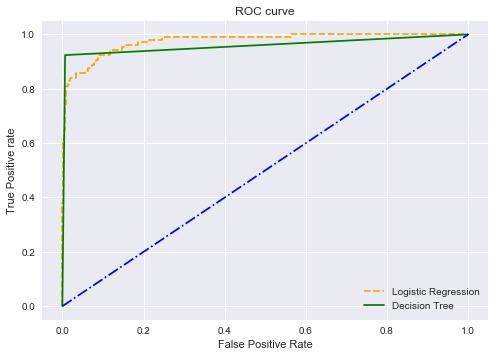

In [242]:
#Plot ROC Curve (TPR vs FPR)
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [243]:
#Print ROC-AUC scores for both models
auc_score1 = roc_auc_score(y_test, log_prob[:,1])
auc_score2 = roc_auc_score(y_test, dt_prob[:,1])

print("ROC-AUC Score for Logistic Regression: ", auc_score1)
print("ROC-AUC Score for Decision Tree: ", auc_score2)

ROC-AUC Score for Logistic Regression:  0.9756530992285182
ROC-AUC Score for Decision Tree:  0.9585528065974994


### Conclusion

- Decision tree gives a better result as compared to it's friends Logisitc Regression :)

    1. In the last lab we saw that there was no proper curve formed because of the low accuracy values.
    2. In this lab we saw that the graphs are quite properly formed and DT gives better results than LR.